In [1]:
import pandas as pd

df = pd.read_csv('sentiment140.csv', encoding='latin1')
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

In [2]:
print(df.isnull().sum())


0                                                                                                                      0
1467810369                                                                                                             0
Mon Apr 06 22:19:45 PDT 2009                                                                                           0
NO_QUERY                                                                                                               0
_TheSpecialOne_                                                                                                        0
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D    0
dtype: int64


In [3]:
df.dropna(inplace=True)


In [4]:
df.drop_duplicates(inplace=True)


In [6]:
import pandas as pd


df = pd.read_csv('sentiment140.csv', encoding='latin1', header=None)

df.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']

df = df.drop(['query'], axis=1)

print(df.head())


   sentiment          id                          date             user  \
0          0  1467810369  Mon Apr 06 22:19:45 PDT 2009  _TheSpecialOne_   
1          0  1467810672  Mon Apr 06 22:19:49 PDT 2009    scotthamilton   
2          0  1467810917  Mon Apr 06 22:19:53 PDT 2009         mattycus   
3          0  1467811184  Mon Apr 06 22:19:57 PDT 2009          ElleCTF   
4          0  1467811193  Mon Apr 06 22:19:57 PDT 2009           Karoli   

                                                text  
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1  is upset that he can't update his Facebook by ...  
2  @Kenichan I dived many times for the ball. Man...  
3    my whole body feels itchy and like its on fire   
4  @nationwideclass no, it's not behaving at all....  


In [7]:
print(df.isnull().sum())
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)


sentiment    0
id           0
date         0
user         0
text         0
dtype: int64


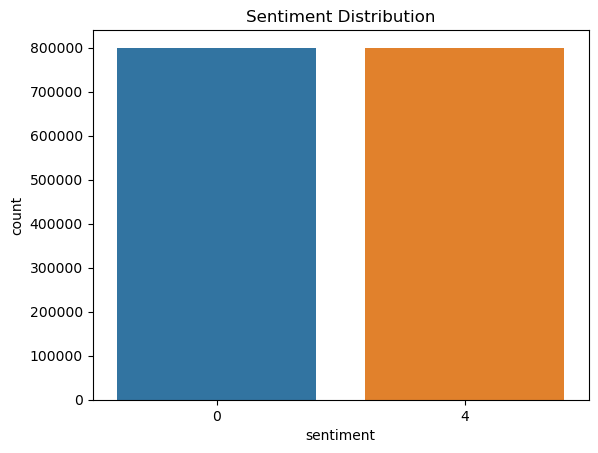

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()


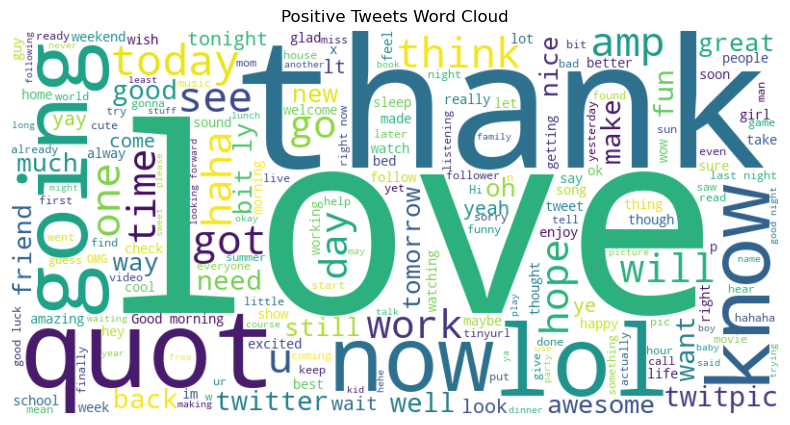

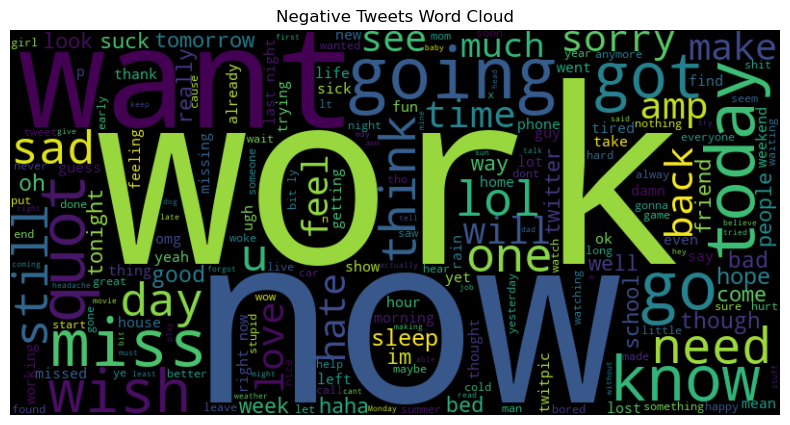

In [13]:
positive_tweets = ' '.join(df[df['sentiment'] == 4]['text'])
negative_tweets = ' '.join(df[df['sentiment'] == 0]['text'])

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_tweets)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Tweets Word Cloud')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Tweets Word Cloud')
plt.show()


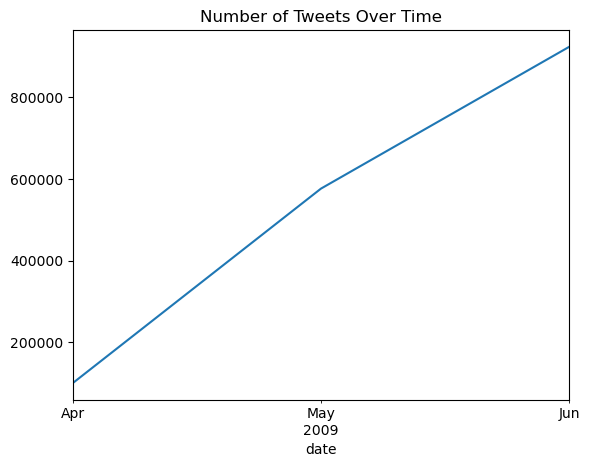

In [20]:
df['date'] = pd.to_datetime(df['date'])

df.set_index('date', inplace=True)
df.resample('M').size().plot()
plt.title('Number of Tweets Over Time')
plt.show()


In [21]:
df.to_csv('cleaned_sentiment140.csv', index=False)


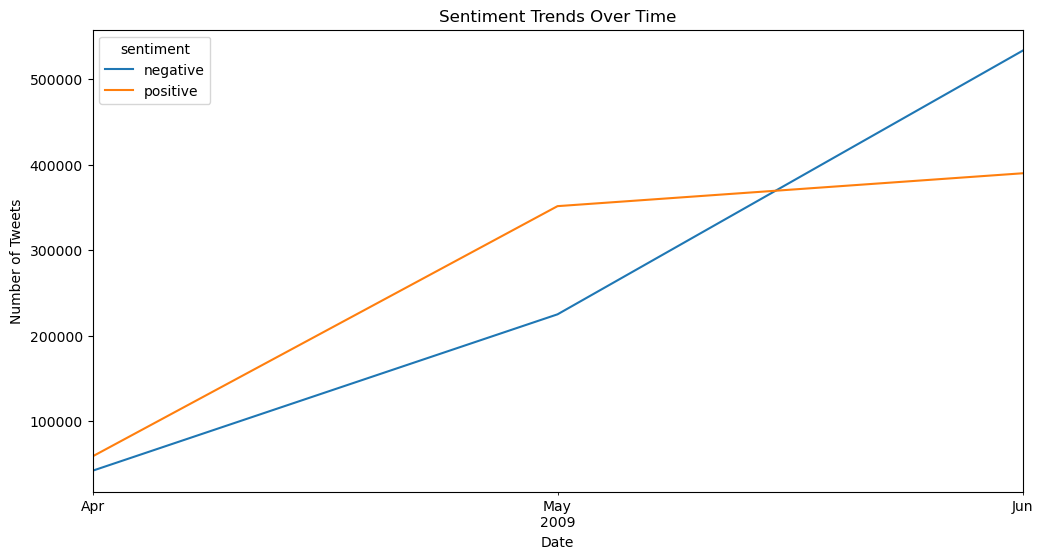

In [23]:
df['sentiment'] = df['sentiment'].map({0: 'negative', 2: 'neutral', 4: 'positive'})

sentiment_counts = df.groupby([pd.Grouper(freq='M'), 'sentiment']).size().unstack(fill_value=0)

sentiment_counts.plot(kind='line', figsize=(12, 6))
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()


In [1]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('sentiment140.csv', encoding='latin-1', header=None)

# Rename the columns
df.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    # Remove special characters and numbers
    tweet = re.sub(r'[^A-Za-z\s]', '', tweet)
    # Tokenize
    words = word_tokenize(tweet)
    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words]
    return ' '.join(words)

df['cleaned_text'] = df['text'].apply(clean_tweet)

# Prepare the data for modeling
X = df['cleaned_text']
y = df['sentiment']

# Vectorize the text data
vectorizer = CountVectorizer()
X_vect = vectorizer.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)


In [2]:

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(classification_report(y_test, y_pred))


Accuracy: 0.783675
F1 Score: 0.7836035617479995
              precision    recall  f1-score   support

           0       0.79      0.77      0.78    159494
           4       0.78      0.80      0.79    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



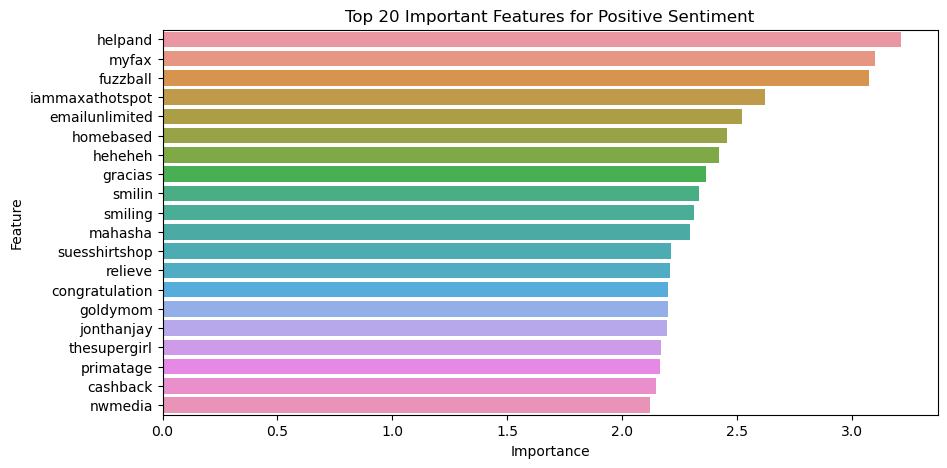

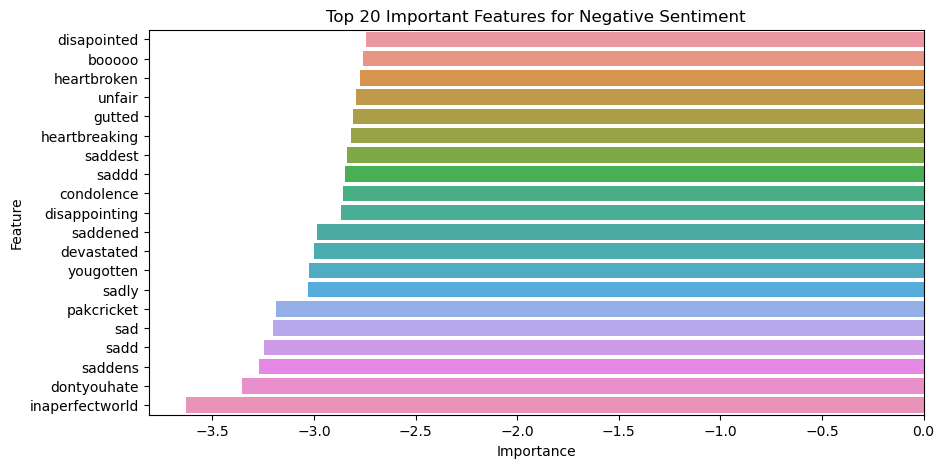

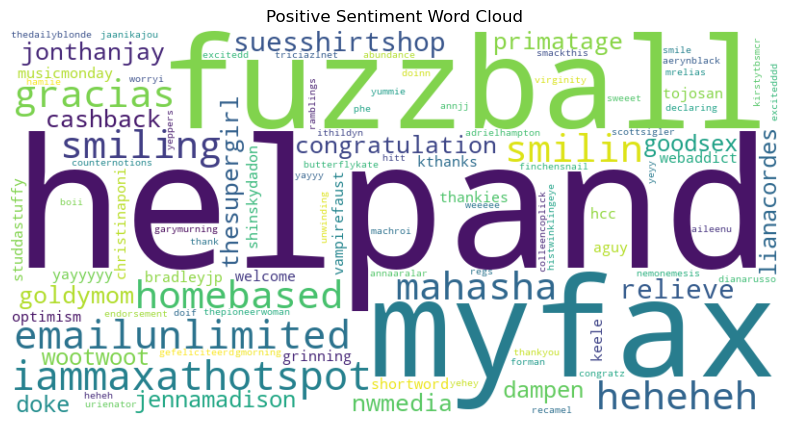

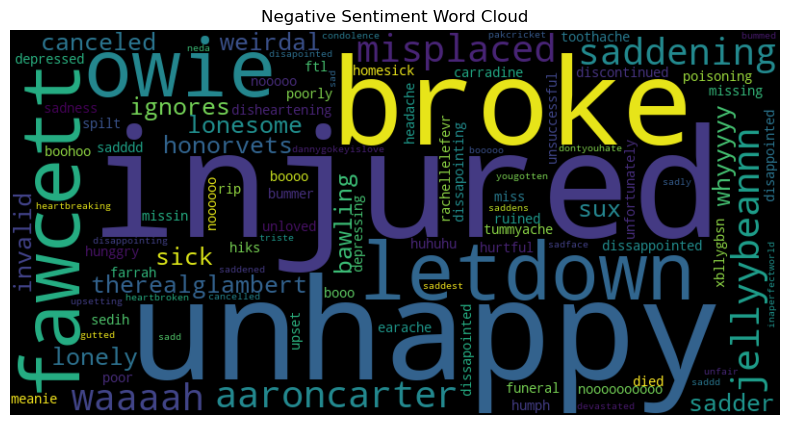

In [6]:
# Get feature importance
feature_importance = model.coef_[0]
feature_names = vectorizer.get_feature_names_out()
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

# Plot feature importance for positive sentiment
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Important Features for Positive Sentiment')
plt.savefig('positive_feature_importance.png')
plt.show()

# Plot feature importance for negative sentiment
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.tail(20))
plt.title('Top 20 Important Features for Negative Sentiment')
plt.savefig('negative_feature_importance.png')
plt.show()

# Generate word clouds for positive and negative sentiment
from wordcloud import WordCloud

positive_words = {feature_names[i]: feature_importance[i] for i in np.argsort(-feature_importance)[:100]}
negative_words = {feature_names[i]: feature_importance[i] for i in np.argsort(feature_importance)[:100]}

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_words)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(negative_words)

# Save and display the positive word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')
plt.savefig('positive_word_cloud.png')
plt.show()

# Save and display the negative word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')
plt.savefig('negative_word_cloud.png')
plt.show()


In [7]:
import streamlit as st

# Load the trained model and vectorizer
# Assuming model and vectorizer are already loaded from previous steps

st.title('Sentiment Analysis')
user_input = st.text_area("Enter Tweet Text")

if st.button('Analyze'):
    if user_input:
        user_input_cleaned = clean_tweet(user_input)
        user_input_vect = vectorizer.transform([user_input_cleaned])
        prediction = model.predict(user_input_vect)
        sentiment = 'Positive' if prediction == 4 else 'Negative'
        st.write(f'Sentiment: {sentiment}')
    else:
        st.write('Please enter some text for analysis.')


2024-06-17 20:41:50.926 
  command:

    streamlit run D:\Anaconda\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [8]:
import joblib

# Save the trained model and vectorizer
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']

In [9]:
pip install scikit-learn joblib nltk


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import joblib
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Function to clean tweet text
def clean_tweet(tweet):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'[^A-Za-z\s]', '', tweet)
    words = word_tokenize(tweet)
    words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words]
    return ' '.join(words)

# Load dataset
df = pd.read_csv('sentiment140.csv', encoding='ISO-8859-1', header=None)
df.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']

# Preprocess tweets
df['cleaned_text'] = df['text'].apply(clean_tweet)

# Vectorize tweets
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['sentiment']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Save model and vectorizer
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['vectorizer.pkl']